In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import yellowbrick
import seaborn as sns

In [111]:
#Step 1:  Load data into a dataframe
df_all= pd.read_csv('nba_1979-2021.csv', index_col=[0])

In [112]:
df_all.head(10)

,Age,Conference,Playoffs,W,L,PW,PL,MOV,SOS,SRS,...,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA,Unnamed: 26
Team,,,,,,,,,,,,,,,,,,,,,
Boston Celtics*,27.3,EAST,1,61,21,60,22,7.79,-0.42,7.37,...,0.550,0.501,15.4,34.8,0.258,0.475,16.5,67.8,0.234,NaN
Los Angeles Lakers*,26.2,WEST,1,60,22,55,27,5.90,-0.51,5.40,...,0.569,0.530,16.5,32.6,0.220,0.475,14.0,66.9,0.181,NaN
Seattle SuperSonics*,27.0,WEST,1,56,26,53,29,4.66,-0.42,4.24,...,0.520,0.474,14.9,36.4,0.229,0.463,15.4,67.9,0.221,NaN
Philadelphia 76ers*,27.0,EAST,1,59,23,52,30,4.22,-0.18,4.04,...,0.544,0.494,17.2,33.5,0.262,0.460,15.5,66.7,0.217,NaN
Milwaukee Bucks*,25.3,WEST,1,49,33,51,31,3.94,-0.37,3.57,...,0.532,0.491,15.0,35.2,0.212,0.467,16.2,63.8,0.229,NaN
Phoenix Suns*,26.5,WEST,1,55,27,50,32,3.60,-0.35,3.25,...,0.548,0.498,16.4,30.4,0.263,0.483,16.5,66.9,0.213,NaN
Kansas City Kings*,25.5,WEST,1,47,35,49,33,3.13,-0.32,2.82,...,0.522,0.480,14.5,31.0,0.223,0.479,17.9,68.1,0.273,NaN
Atlanta Hawks*,26.1,EAST,1,50,32,49,33,2.91,-0.09,2.83,...,0.523,0.465,15.4,36.9,0.290,0.461,17.1,65.6,0.291,NaN
Cleveland Cavaliers,27.4,EAST,0,37,45,42,40,0.34,0.09,0.43,...,0.519,0.476,13.2,33.1,0.212,0.505,16.3,65.9,0.216,NaN


In [113]:
df = df_all.dropna(how='all', axis='columns')

In [114]:
#Check column names
df.columns

Index(['Age', 'Conference', 'Playoffs', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'DeFG%', 'DTOV%', 'DRB%', 'DFT/FGA'],
      dtype='object')

In [115]:
#Summary of Data
print("Describe Data")
print(df.describe())
print("Summarized Data")
print(df.describe(include=['O']))

Describe Data
               Age     Playoffs            W            L           PW  \
count  1018.000000  1018.000000  1018.000000  1018.000000  1018.000000   
mean     26.838016     0.565815    40.851670    40.851670    40.927308   
std       1.623681     0.495893    12.581948    12.582651    12.068333   
min      22.700000     0.000000    10.000000     9.000000    10.000000   
25%      25.700000     0.000000    31.000000    32.000000    32.000000   
50%      26.700000     1.000000    42.000000    40.000000    41.000000   
75%      27.900000     1.000000    50.000000    50.000000    50.000000   
max      32.000000     1.000000    73.000000    72.000000    70.000000   

                PL          MOV          SOS          SRS         ORtg  ...  \
count  1018.000000  1018.000000  1018.000000  1018.000000  1018.000000  ...   
mean     40.776031     0.000020    -0.000580    -0.000393   106.858546  ...   
std      12.068998     4.628063     0.388505     4.460489     3.855878  ...   
min

In [116]:
# Create features variable to use in analysis
features = ['Age', 'Playoffs','W', 'L','MOV', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'DeFG%', 'DTOV%', 'DRB%']

In [117]:
enumerate(features)

In [118]:
list(enumerate(features))

[(0, 'Age'),
 (1, 'Playoffs'),
 (2, 'W'),
 (3, 'L'),
 (4, 'MOV'),
 (5, 'ORtg'),
 (6, 'DRtg'),
 (7, 'Pace'),
 (8, 'FTr'),
 (9, '3PAr'),
 (10, 'TS%'),
 (11, 'eFG%'),
 (12, 'TOV%'),
 (13, 'ORB%'),
 (14, 'FT/FGA'),
 (15, 'DeFG%'),
 (16, 'DTOV%'),
 (17, 'DRB%')]

In [119]:
#Check data types
df.dtypes

Age           float64
Conference     object
Playoffs        int64
W               int64
L               int64
PW              int64
PL              int64
MOV           float64
SOS           float64
SRS           float64
ORtg          float64
DRtg          float64
NRtg          float64
Pace          float64
FTr           float64
3PAr          float64
TS%           float64
eFG%          float64
TOV%          float64
ORB%          float64
FT/FGA        float64
DeFG%         float64
DTOV%         float64
DRB%          float64
DFT/FGA       float64
dtype: object

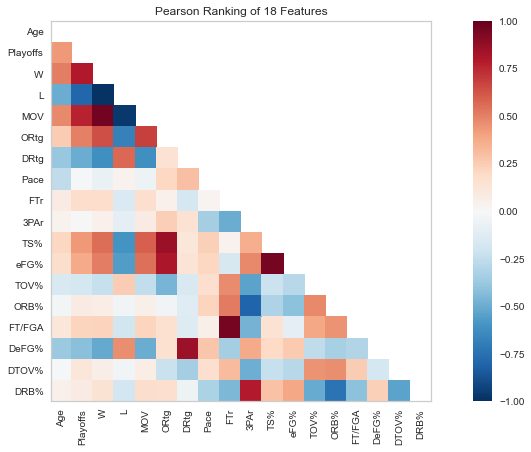

In [120]:
#Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="teams.png") # Draw/show/poof the data
plt.show()

In [121]:
df_east = df[df["Conference"] =="EAST"]

In [122]:
df_east.head(10)

,Age,Conference,Playoffs,W,L,PW,PL,MOV,SOS,SRS,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,,,
Boston Celtics*,27.3,EAST,1,61,21,60,22,7.79,-0.42,7.37,...,0.057,0.550,0.501,15.4,34.8,0.258,0.475,16.5,67.8,0.234
Philadelphia 76ers*,27.0,EAST,1,59,23,52,30,4.22,-0.18,4.04,...,0.017,0.544,0.494,17.2,33.5,0.262,0.460,15.5,66.7,0.217
Atlanta Hawks*,26.1,EAST,1,50,32,49,33,2.91,-0.09,2.83,...,0.011,0.523,0.465,15.4,36.9,0.290,0.461,17.1,65.6,0.291
Cleveland Cavaliers,27.4,EAST,0,37,45,42,40,0.34,0.09,0.43,...,0.023,0.519,0.476,13.2,33.1,0.212,0.505,16.3,65.9,0.216
Houston Rockets*,27.3,EAST,1,41,41,41,41,0.17,0.10,0.27,...,0.051,0.533,0.487,15.5,37.6,0.238,0.499,16.1,63.2,0.230
San Antonio Spurs*,26.9,EAST,1,41,41,40,42,-0.38,0.13,-0.24,...,0.027,0.553,0.502,15.2,31.8,0.262,0.506,14.4,66.8,0.216
Indiana Pacers,25.3,EAST,0,37,45,39,43,-0.70,0.16,-0.54,...,0.041,0.523,0.479,14.8,35.4,0.228,0.493,17.0,62.5,0.230
New Jersey Nets,26.1,EAST,0,34,48,38,44,-1.17,0.19,-0.98,...,0.040,0.518,0.466,16.6,32.1,0.251,0.472,16.5,66.4,0.263
New York Knicks,24.1,EAST,0,39,43,38,44,-1.15,0.19,-0.96,...,0.025,0.539,0.498,15.7,33.7,0.221,0.498,16.4,64.0,0.263


In [123]:
df_west = df[df["Conference"] =="WEST"]

In [124]:
df_west.head(10)

,Age,Conference,Playoffs,W,L,PW,PL,MOV,SOS,SRS,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,,,
Los Angeles Lakers*,26.2,WEST,1,60,22,55,27,5.90,-0.51,5.40,...,0.014,0.569,0.530,16.5,32.6,0.220,0.475,14.0,66.9,0.181
Seattle SuperSonics*,27.0,WEST,1,56,26,53,29,4.66,-0.42,4.24,...,0.025,0.520,0.474,14.9,36.4,0.229,0.463,15.4,67.9,0.221
Milwaukee Bucks*,25.3,WEST,1,49,33,51,31,3.94,-0.37,3.57,...,0.021,0.532,0.491,15.0,35.2,0.212,0.467,16.2,63.8,0.229
Phoenix Suns*,26.5,WEST,1,55,27,50,32,3.60,-0.35,3.25,...,0.039,0.548,0.498,16.4,30.4,0.263,0.483,16.5,66.9,0.213
Kansas City Kings*,25.5,WEST,1,47,35,49,33,3.13,-0.32,2.82,...,0.015,0.522,0.480,14.5,31.0,0.223,0.479,17.9,68.1,0.273
Portland Trail Blazers*,26.3,WEST,1,38,44,39,43,-0.82,-0.05,-0.87,...,0.018,0.519,0.477,16.1,35.5,0.218,0.482,15.3,67.9,0.245
Chicago Bulls,25.9,WEST,0,30,52,34,48,-2.71,0.08,-2.63,...,0.040,0.545,0.489,17.2,32.2,0.291,0.500,15.7,68.0,0.251
San Diego Clippers,27.6,WEST,0,35,47,30,52,-4.15,0.18,-3.97,...,0.072,0.522,0.482,14.6,34.2,0.213,0.503,14.2,65.4,0.215
Denver Nuggets,27.1,WEST,0,30,52,30,52,-4.41,0.20,-4.22,...,0.034,0.517,0.469,15.1,33.6,0.250,0.497,14.4,67.8,0.224


In [125]:
#Import packages
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [126]:
df_east.shape

(511, 25)

In [127]:
df_west.shape

(507, 25)

In [128]:
df_east.columns

Index(['Age', 'Conference', 'Playoffs', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'DeFG%', 'DTOV%', 'DRB%', 'DFT/FGA'],
      dtype='object')

In [129]:
df_west.columns

Index(['Age', 'Conference', 'Playoffs', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'DeFG%', 'DTOV%', 'DRB%', 'DFT/FGA'],
      dtype='object')

In [130]:
df['Playoffs'].value_counts()

1    576
0    442
Name: Playoffs, dtype: int64

0 --> Didn't make playoffs

1 --> Made playoffs

In [131]:
df.groupby('Playoffs').mean()

,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Playoffs,,,,,,,,,,,,,,,,,,,,,
0,26.039367,29.400452,52.282805,30.199095,51.484163,-4.062195,0.193303,-3.869389,104.644796,108.877376,...,0.174181,0.527179,0.484333,14.237104,28.577602,0.224783,0.50398,13.802489,70.647738,0.236842
1,27.450868,49.638889,32.079861,49.159722,32.559028,3.117205,-0.149358,2.968524,108.557292,105.287674,...,0.174795,0.545250,0.501439,13.792535,29.255729,0.238128,0.48617,14.123611,71.311111,0.229134


In [132]:
df_east.groupby('Playoffs').mean()

,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Playoffs,,,,,,,,,,,,,,,,,,,,,
0,26.075556,29.271111,52.417778,30.257778,51.431111,-3.989556,0.098622,-3.891822,104.263111,108.436444,...,0.173831,0.525556,0.482747,14.240444,28.428889,0.223800,0.502493,13.930667,70.853778,0.238489
1,27.348252,48.475524,33.237762,47.944056,33.769231,2.637448,-0.178881,2.458776,107.832867,105.051748,...,0.174434,0.541832,0.497734,13.863636,29.190909,0.237325,0.485276,14.216434,71.423776,0.230892


In [133]:
df_west.groupby('Playoffs').mean()

,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Playoffs,,,,,,,,,,,,,,,,,,,,,
0,26.001843,29.534562,52.142857,30.138249,51.539171,-4.137512,0.291475,-3.846129,105.040553,109.334562,...,0.174544,0.528862,0.485977,14.233641,28.731797,0.225802,0.505521,13.669585,70.434101,0.235134
1,27.552069,50.786207,30.937931,50.358621,31.365517,3.590345,-0.120241,3.471241,109.271724,105.520345,...,0.175152,0.548621,0.505093,13.722414,29.319655,0.238921,0.487052,14.032069,71.200000,0.227400


In [134]:
#Drop columns that we are trying to predict ("Playoffs") and columns that we don't need in the training.

X_east = df_east.drop(['W', 'L', 'Playoffs', 'PW', 'PL', 'Conference'], axis=1)
Y_east = df_east['Playoffs']

In [135]:
X_west = df_west.drop(['W', 'L', 'Playoffs', 'PW', 'PL', 'Conference'], axis=1)
Y_west = df_west['Playoffs']

In [136]:
X_east.shape

(511, 19)

In [137]:
Y_east.shape

(511,)

In [138]:
X_west.shape

(507, 19)

In [139]:
Y_west.shape

(507,)

In [140]:
print(Y_east)

Team
Boston Celtics*        1
Philadelphia 76ers*    1
Atlanta Hawks*         1
Cleveland Cavaliers    0
Houston Rockets*       1
                      ..
Washington Wizards*    1
Charlotte Hornets      0
Detroit Pistons        0
Cleveland Cavaliers    0
Orlando Magic          0
Name: Playoffs, Length: 511, dtype: int64


In [141]:
print(Y_west)

Team
Los Angeles Lakers*       1
Seattle SuperSonics*      1
Milwaukee Bucks*          1
Phoenix Suns*             1
Kansas City Kings*        1
                         ..
San Antonio Spurs         0
Sacramento Kings          0
Minnesota Timberwolves    0
Houston Rockets           0
Oklahoma City Thunder     0
Name: Playoffs, Length: 507, dtype: int64


In [142]:
#Use train, test, split method to separate training and test set
x_train, x_test, y_train, y_test = train_test_split(X_east, Y_east, test_size=0.2, random_state=2)

In [143]:
x_train

,Age,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,
New Jersey Nets*,25.2,2.77,0.01,2.77,101.6,98.9,2.7,104.0,0.322,0.021,0.532,0.494,18.7,36.8,0.227,0.481,18.9,68.8,0.251
Detroit Pistons,24.5,-4.47,0.09,-4.38,108.0,112.5,-4.5,97.9,0.273,0.385,0.556,0.519,13.5,21.9,0.207,0.541,12.6,76.9,0.195
Atlanta Hawks*,26.1,2.91,-0.09,2.83,105.2,102.3,2.9,98.9,0.376,0.011,0.523,0.465,15.4,36.9,0.290,0.461,17.1,65.6,0.291
Golden State Warriors,25.1,1.04,-0.24,0.80,108.8,107.7,1.1,101.4,0.324,0.044,0.541,0.502,14.5,34.8,0.233,0.493,14.1,68.8,0.256
New York Knicks,27.3,-3.67,-0.20,-3.87,107.7,111.5,-3.8,96.0,0.239,0.279,0.534,0.496,12.4,26.6,0.188,0.511,11.7,74.1,0.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston Celtics*,27.3,6.38,-0.03,6.35,109.8,103.5,6.3,101.5,0.335,0.025,0.545,0.502,14.7,35.8,0.248,0.472,14.6,67.6,0.220
Washington Bullets*,27.1,-1.80,0.53,-1.28,103.0,104.8,-1.8,99.1,0.320,0.057,0.518,0.471,14.2,29.1,0.238,0.472,14.2,66.1,0.224
Chicago Bulls,24.0,-8.41,0.10,-8.32,104.8,113.2,-8.4,99.0,0.235,0.295,0.541,0.505,12.7,19.4,0.184,0.541,11.9,77.3,0.188


In [144]:
x_test

,Age,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,
Atlanta Hawks*,24.2,-1.82,-0.41,-2.23,106.9,108.9,-2.0,91.1,0.340,0.165,0.535,0.483,14.0,29.7,0.263,0.501,12.9,71.7,0.217
Atlanta Hawks,26.2,-4.65,-0.36,-5.00,101.0,106.1,-5.1,90.8,0.303,0.191,0.514,0.465,15.4,28.6,0.235,0.476,13.1,70.5,0.234
Orlando Magic,25.8,-7.02,-0.23,-7.25,102.7,110.4,-7.7,90.8,0.296,0.184,0.504,0.461,12.8,28.1,0.218,0.502,12.7,68.7,0.214
Washington Wizards*,26.3,1.27,-0.79,0.48,106.0,104.6,1.4,93.2,0.248,0.246,0.538,0.506,13.6,25.2,0.181,0.504,15.0,75.7,0.220
New Jersey Nets*,28.6,1.37,-0.26,1.11,103.9,102.4,1.5,89.8,0.346,0.229,0.528,0.478,13.3,24.0,0.262,0.476,14.0,76.3,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milwaukee Bucks*,26.6,7.27,-0.13,7.14,108.7,101.8,6.9,103.6,0.313,0.018,0.546,0.500,15.7,36.3,0.241,0.461,16.6,65.6,0.280
Brooklyn Nets*,30.0,-1.00,-0.58,-1.58,106.7,107.7,-1.0,91.4,0.313,0.301,0.555,0.514,14.1,21.7,0.236,0.509,14.9,72.3,0.236
New York Knicks*,30.4,2.32,-0.08,2.24,106.0,103.5,2.5,91.0,0.306,0.201,0.550,0.509,14.9,25.5,0.232,0.476,14.8,71.1,0.251


In [145]:
scaler = StandardScaler()

In [146]:
x_train = scaler.fit_transform(x_train)

In [147]:
x_test = scaler.transform(x_test)

In [148]:
print(X_east.shape, x_train.shape, x_test.shape)

(511, 19) (408, 19) (103, 19)


In [149]:
#Call linear regression model
regr = LinearRegression()

In [150]:
#Fitting training data
regr.fit(x_train, y_train)

LinearRegression()

In [151]:
y_predict = regr.predict(x_test)

In [152]:
y_predict

array([ 0.45010959,  0.27152451, -0.00864237,  0.61871804,  0.72074532,
        0.01093635,  0.91288224,  0.26242572,  0.43582875,  0.10210308,
        0.4093928 ,  0.30293797,  1.33002425,  0.59342297,  0.90301862,
        0.98343505,  0.36573823,  0.53928528, -0.08769819,  0.82860195,
        0.65311294,  0.98033456,  0.57444507,  0.57326592,  0.85753272,
        0.52582159,  0.24208106,  0.55387285,  0.19047537,  0.66329755,
        0.92111899,  0.88706695,  0.31170968,  0.11578722,  0.80157534,
        0.56834739,  0.36392546,  0.96219875,  0.09728762, -0.00310318,
        0.70912339,  0.08839846,  1.06695611,  0.88516205,  0.78828616,
        0.70332059,  0.24856311,  0.84077287,  0.81477091,  0.15500432,
        0.14703786,  0.44115006,  0.41165995,  1.13413036,  0.75645294,
        0.74278249,  0.74192327,  1.601569  ,  1.06014247,  1.15996939,
        0.00547824, -0.08455203,  1.04622342, -0.17025392,  0.24091114,
        1.24452364,  0.31683114,  0.34940653,  0.64595471, -0.26

In [160]:
y_predict[3]

0.6187180399271088

In [161]:
y_test[3]

1

In [162]:
from sklearn.metrics import r2_score

In [163]:
# Making Predictions of y_value
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5748614453979131
0.6101736155465991


In [164]:
#Check coefficient of determination of model
regr.score(x_test, y_test)

0.6101736155465991

In [165]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.26075028914270626
Mean Squared Error: 0.09700647138815897
Root Mean Squared Error: 0.3114586190622423


In [166]:
#Use train, test, split method to separate training and test set
x_train, x_test, y_train, y_test = train_test_split(X_west, Y_west, test_size=0.2, random_state=2)

In [167]:
x_train

,Age,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,
Houston Rockets,28.8,-1.59,0.28,-1.30,101.6,103.3,-1.7,88.0,0.317,0.226,0.519,0.471,14.3,25.5,0.240,0.472,13.1,74.6,0.247
Seattle SuperSonics*,27.4,3.21,-0.33,2.88,105.9,102.8,3.1,103.2,0.338,0.019,0.539,0.496,15.5,32.5,0.247,0.464,14.3,66.2,0.210
Los Angeles Lakers*,29.8,3.90,0.45,4.35,105.5,101.3,4.2,92.3,0.352,0.167,0.522,0.481,12.8,28.1,0.244,0.471,14.3,73.3,0.222
Milwaukee Bucks*,25.3,3.94,-0.37,3.57,106.8,102.9,3.9,102.4,0.278,0.021,0.532,0.491,15.0,35.2,0.212,0.467,16.2,63.8,0.229
Phoenix Suns*,26.4,3.45,-0.40,3.05,105.8,102.4,3.4,99.5,0.302,0.024,0.538,0.495,15.9,32.2,0.229,0.470,14.6,68.5,0.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dallas Mavericks,24.8,-8.40,0.07,-8.33,102.4,110.8,-8.4,98.6,0.359,0.024,0.519,0.466,15.2,30.7,0.270,0.516,15.1,65.0,0.245
Denver Nuggets*,28.1,1.30,-0.42,0.89,107.1,105.9,1.2,106.7,0.307,0.039,0.527,0.475,13.0,30.9,0.245,0.495,16.9,64.1,0.266
Los Angeles Clippers*,28.8,6.18,-0.16,6.02,117.6,111.2,6.4,96.9,0.222,0.400,0.599,0.564,12.2,22.7,0.186,0.531,11.9,79.1,0.186


In [168]:
x_test

,Age,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,,
Utah Jazz*,26.7,4.30,0.17,4.47,108.4,103.9,4.5,95.7,0.260,0.357,0.564,0.527,13.7,21.5,0.202,0.506,14.0,79.8,0.190
Los Angeles Lakers*,28.0,-1.27,0.06,-1.20,107.6,108.9,-1.3,96.2,0.329,0.090,0.534,0.486,13.7,31.4,0.249,0.500,14.3,66.4,0.215
Seattle SuperSonics,26.0,-0.63,0.66,0.02,107.3,108.0,-0.7,89.9,0.270,0.294,0.540,0.501,13.9,27.2,0.207,0.487,13.9,68.5,0.237
Seattle SuperSonics*,29.6,7.79,-0.40,7.40,110.3,102.1,8.2,93.8,0.379,0.249,0.574,0.526,16.2,29.7,0.288,0.479,16.7,69.5,0.252
Sacramento Kings,24.1,-4.37,0.30,-4.06,105.3,109.9,-4.6,94.0,0.286,0.201,0.528,0.491,13.6,27.8,0.207,0.505,12.6,73.5,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Los Angeles Lakers*,26.5,4.27,-0.61,3.66,108.3,103.7,4.6,91.1,0.351,0.226,0.535,0.496,13.7,31.6,0.243,0.478,15.1,68.5,0.231
Los Angeles Lakers*,27.0,3.84,-0.57,3.27,107.6,103.9,3.7,102.7,0.286,0.013,0.548,0.513,15.8,33.9,0.209,0.468,14.6,64.4,0.208
Sacramento Kings,25.9,-6.78,0.51,-6.27,102.0,109.1,-7.1,94.7,0.309,0.085,0.512,0.468,14.1,28.8,0.226,0.481,14.3,65.6,0.306


In [169]:
x_train = scaler.fit_transform(x_train)

In [170]:
x_test = scaler.transform(x_test)

In [171]:
print(X_east.shape, x_train.shape, x_test.shape)

(511, 19) (405, 19) (102, 19)


In [172]:
#Fitting training data
regr.fit(x_train, y_train)

LinearRegression()

In [173]:
y_predict = regr.predict(x_test)

In [175]:
y_predict[3]

1.2983073144347879

In [176]:
y_test[3]

1

In [177]:
# Making Predictions of y_value
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6745781535302617
0.6020512619902851


In [178]:
#Check coefficient of determination of model
regr.score(x_test, y_test)

0.6020512619902851

In [179]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.25871664326247745
Mean Squared Error: 0.09703921071997758
Root Mean Squared Error: 0.31151117270489287
